![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a maximum score of 800 points. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [79]:
# Re-run this cell 
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [80]:
schools.info()

schools.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


,average_math,average_reading,average_writing,percent_tested
count,375.000000,375.000000,375.000000,355.000000
mean,432.944000,424.504000,418.458667,64.976338
std,71.952373,61.881069,64.548599,18.747634
min,317.000000,302.000000,284.000000,18.500000
25%,386.000000,386.000000,382.000000,50.950000
50%,415.000000,413.000000,403.000000,64.800000
75%,458.500000,445.000000,437.500000,79.600000
max,754.000000,697.000000,693.000000,100.000000


In [81]:
print('Number of unique schools:',schools['school_name'].nunique())

Number of unique schools: 375


In [82]:
math_greater_equal_80 = schools[schools['average_math'] >= (0.8*800)]
best_math_schools = math_greater_equal_80[['school_name','average_math']].sort_values('average_math',ascending=False)
print('The top 5 math schools are:\n',best_math_schools.head())

The top 5 math schools are:
                                            school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683


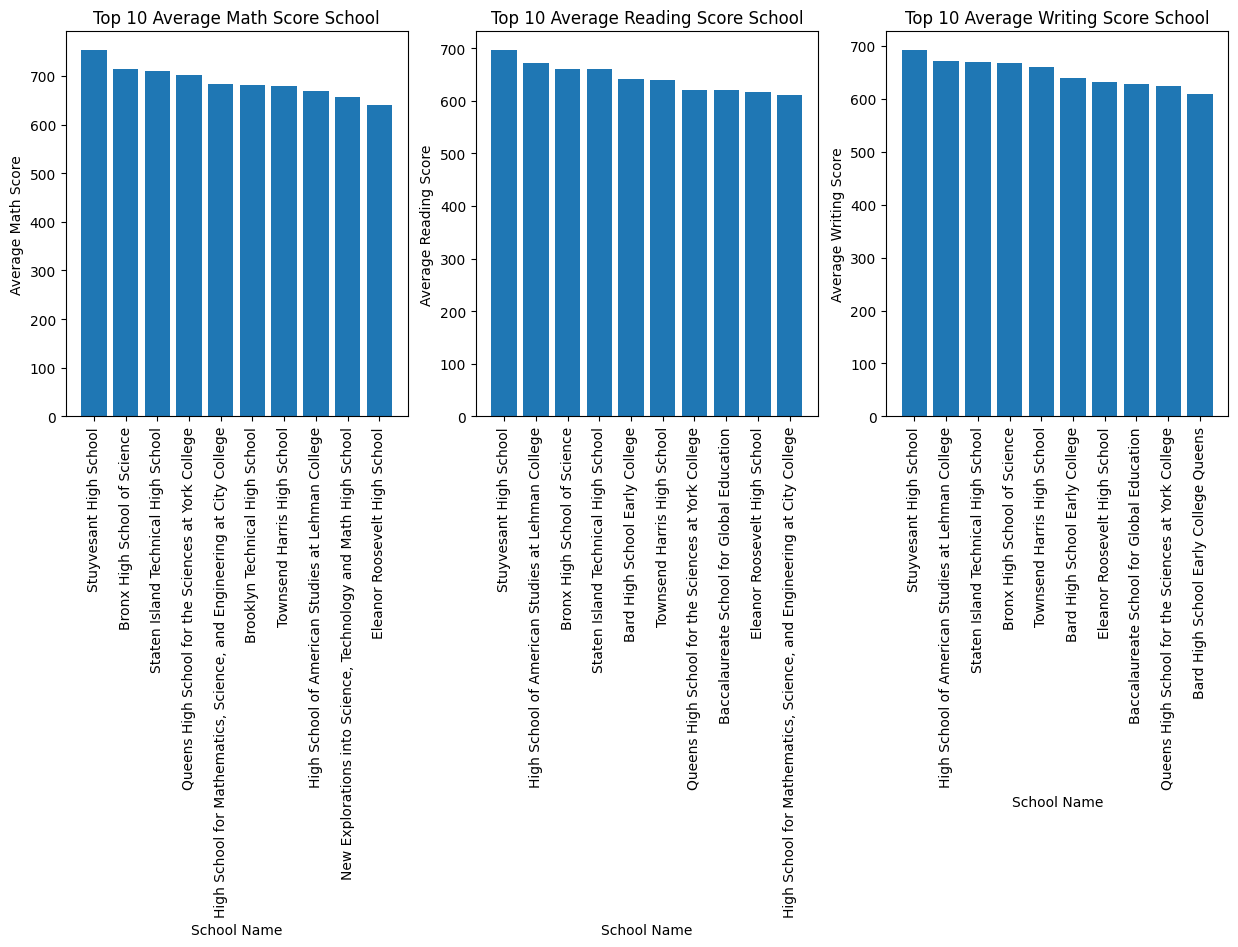

In [83]:
top_10_avg_math_school = schools[['school_name','average_math']].sort_values('average_math',ascending=False)[:10]
top_10_avg_reading_school = schools[['school_name','average_reading']].sort_values('average_reading',ascending=False)[:10]
top_10_avg_writing_school = schools[['school_name','average_writing']].sort_values('average_writing',ascending=False)[:10]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for Average Math Score
axes[0].bar(top_10_avg_math_school['school_name'], top_10_avg_math_school['average_math'])
axes[0].set_xlabel('School Name')
axes[0].set_ylabel('Average Math Score')
axes[0].set_title('Top 10 Average Math Score School')
axes[0].tick_params(axis='x', rotation=90)

# Plot for Average Reading Score
axes[1].bar(top_10_avg_reading_school['school_name'], top_10_avg_reading_school['average_reading'])
axes[1].set_xlabel('School Name')
axes[1].set_ylabel('Average Reading Score')
axes[1].set_title('Top 10 Average Reading Score School')
axes[1].tick_params(axis='x', rotation=90)

# Plot for Average Writing Score
axes[2].bar(top_10_avg_writing_school['school_name'], top_10_avg_writing_school['average_writing'])
axes[2].set_xlabel('School Name')
axes[2].set_ylabel('Average Writing Score')
axes[2].set_title('Top 10 Average Writing Score School')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


The bar graphs above show that Stuyvesant High School has achieved the highest average math, reading and writing score. This grew my curiosity further and I wanted to see which borough it belonged to and what its total SAT score was.

In [84]:
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']
top_10_schools = schools[['school_name','total_SAT']].sort_values('total_SAT',ascending=False)[:10]
print('The top 10 schools with the highest total average SAT scores are:\n',top_10_schools)

The top 10 schools with the highest total average SAT scores are:
                                            school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


In [85]:
print('Stuyvesant High School is in',schools[schools['school_name'] == 'Stuyvesant High School']['borough'])

schools_per_borough = schools.groupby('borough')['school_name'].count().sort_values(ascending=False)
print(schools_per_borough)

Stuyvesant High School is in 88    Manhattan
Name: borough, dtype: object
borough
Brooklyn         109
Bronx             98
Manhattan         89
Queens            69
Staten Island     10
Name: school_name, dtype: int64


Analysis show that Stuyvesant High School's total SAT scores were the highest amongst all the other schools. The school belonged to the Manhattan borough where Manhattan held the third highest number of high schools.

Top 10 performing Schools and Boroughs:
            borough  ... total_SAT
88       Manhattan  ...      2144
170          Bronx  ...      2041
93   Staten Island  ...      2041
174          Bronx  ...      2013
333         Queens  ...      1981
365         Queens  ...      1947
5        Manhattan  ...      1914
280       Brooklyn  ...      1896
45       Manhattan  ...      1889
68       Manhattan  ...      1889

[10 rows x 3 columns]


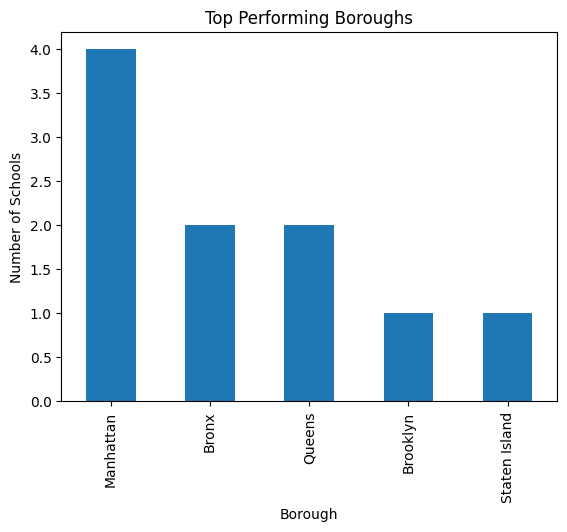

In [86]:
top_10_school_borough_total_sat = schools[['borough','school_name','total_SAT']].sort_values('total_SAT',ascending=False)[:10]
print('Top 10 performing Schools and Boroughs:\n',top_10_school_borough_total_sat)

best_boroughs = top_10_school_borough_total_sat.groupby('borough')['school_name'].count().sort_values(ascending=False)

# Plotting the bar chart
best_boroughs.plot(kind='bar')

# Adding labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.title('Top Performing Boroughs')

# Show the plot
plt.show()


Bottom 10 performing Schools and Boroughs:
        borough                                        school_name  total_SAT
182      Bronx   Pan American International High School at Monroe        924
247   Brooklyn                          Multicultural High School        926
295   Brooklyn      International High School at Prospect Heights        946
337     Queens             Pan American International High School        978
171      Bronx              Kingsbridge International High School        987
109      Bronx                International Community High School        995
114      Bronx                    Bronx International High School       1005
34   Manhattan            Manhattan Academy for Arts and Language       1005
242   Brooklyn  W. H. Maxwell Career and Technical Education H...       1009
179      Bronx             High School of Language and Innovation       1016


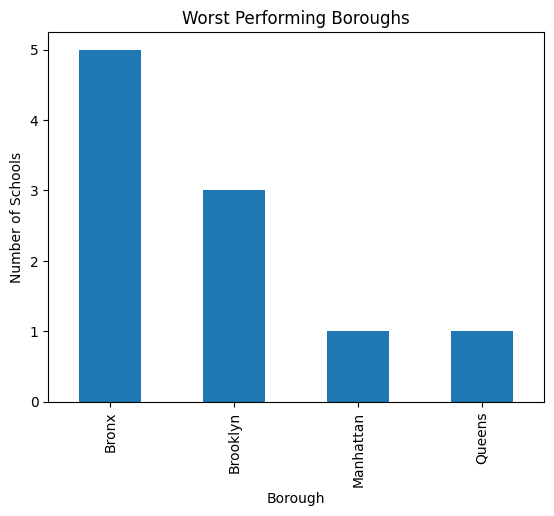

In [87]:
bottom_10_school_borough_total_sat = schools[['borough','school_name','total_SAT']].sort_values('total_SAT',ascending=True)[:10]

print('Bottom 10 performing Schools and Boroughs:\n',bottom_10_school_borough_total_sat)

worst_boroughs = bottom_10_school_borough_total_sat.groupby('borough')['school_name'].count().sort_values(ascending=False)

# Plotting the bar chart
worst_boroughs.plot(kind='bar')

# Adding labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.title('Worst Performing Boroughs')

# Show the plot
plt.show()

In [88]:
schools_per_borough = schools.groupby('borough')['school_name'].count()
avg_SAT_per_borough = schools.groupby('borough')['total_SAT'].mean()
std_SAT_per_borough = schools.groupby('borough')['total_SAT'].std()

In [89]:
largest_std_dev_all = schools.groupby('borough')['total_SAT'].agg(['count','mean','std']).round(2)

largest_std_dev = largest_std_dev_all[largest_std_dev_all['std']==largest_std_dev_all['std'].max()]

largest_std_dev = largest_std_dev.rename(columns={'count':'num_schools','mean':'average_SAT','std':'std_SAT'})
largest_std_dev

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29


In [90]:
largest_std_dev_all

,count,mean,std
borough,,,
Bronx,98,1202.72,150.39
Brooklyn,109,1230.26,154.87
Manhattan,89,1340.13,230.29
Queens,69,1345.48,195.25
Staten Island,10,1439.00,222.30


In [91]:
median = schools['total_SAT'].median()
median

1226.0

In [92]:
less_than_median = schools[schools['total_SAT']<=median]
less_than_median.groupby('borough')['school_name'].count().sort_values(ascending=False)

borough
Brooklyn     71
Bronx        65
Manhattan    33
Queens       19
Name: school_name, dtype: int64

In [93]:
more_than_median = schools[schools['total_SAT']>=median]
more_than_median.groupby('borough')['school_name'].count().sort_values(ascending=False)

borough
Manhattan        57
Queens           50
Brooklyn         39
Bronx            33
Staten Island    10
Name: school_name, dtype: int64

**Analysis:**

The Bronx, despite having the second-highest number of schools, displays a wide spectrum of performance. On one end, it harbors the least performing school, while on the other end, it boasts the second-best performing school, as indicated by the total average SAT scores.

Contrastingly, Manhattan stands out with the highest number of top-performing schools, including the best-performing school based on the total average SAT scores. However, the borough also exhibits the highest standard deviation, signifying a considerable performance variation among its schools. Some schools significantly outperform the mean, while others lag behind.

Staten Island offers an intriguing dynamic with one school ranking among the top 10, yet none in the bottom 10. Despite having the second-highest standard deviation for total SAT scores, all of its schools consistently perform above the median.

This analysis underscores the complexity of categorizing a borough as universally good or bad. Instead, it suggests a need for targeted interventions in schools that are underperforming, exploring the factors influencing their performance. Parents can leverage this information to make informed decisions about schools suitable for their children.

The findings challenge the assumption that higher standard deviation correlates with poorer performance. Staten Island's case demonstrates that, despite variability, all schools perform above the median. Families considering relocation based on school quality should weigh factors beyond borough-wide averages, considering individual school performance and the unique needs of their children.